In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [222]:
print(train.shape)
print(test.shape)

(8693, 14)
(4277, 13)


In [223]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
            #MISSING VALUES

In [224]:
train.isna().sum().nlargest(14)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [225]:
test.isna().sum().nlargest(14)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [226]:
num_vars = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [227]:
cat_vars = ['HomePlanet','CryoSleep','Destination', 'VIP']

In [228]:
for i in cat_vars:
    value_counts = train[i].value_counts()
    print('value counts for ' + i)
    print('-------------')
    print(value_counts)

value counts for HomePlanet
-------------
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
value counts for CryoSleep
-------------
False    5439
True     3037
Name: CryoSleep, dtype: int64
value counts for Destination
-------------
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
value counts for VIP
-------------
False    8291
True      199
Name: VIP, dtype: int64


In [229]:
# fill missing values in spending features with '0' 

train[num_vars] = train[num_vars].fillna(0)
test[num_vars] = test[num_vars].fillna(0)

In [230]:
train['Cabin'].value_counts()

G/734/S     8
E/13/S      7
G/1476/S    7
C/137/S     7
G/981/S     7
           ..
F/517/P     1
G/431/S     1
G/86/S      1
F/726/S     1
E/215/S     1
Name: Cabin, Length: 6560, dtype: int64

In [231]:
# fill Age missing values with median

train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

In [232]:
# fill categorical variables MV with Mode
for i in cat_vars:
    mode_train = train[i].mode().values[0]
    mode_test = test[i].mode().values[0]
    train[i] = train[i].fillna(mode_train)
    test[i] = test[i].fillna(mode_test)

In [233]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')

In [234]:
# imputing cabin with simple imputer 
train['Cabin'] = imputer.fit_transform(train['Cabin'].values.reshape(-1,1))
test['Cabin'] = imputer.fit_transform(test['Cabin'].values.reshape(-1,1))

In [235]:
# dropping Name variable - not useful
train.drop(columns = 'Name', inplace = True)
test.drop(columns = 'Name', inplace = True)

In [153]:
### FEATURE ENGINEERING
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [236]:
train['TotalSpend'] = train[['RoomService','FoodCourt', 'ShoppingMall', 
                             'Spa', 'VRDeck']].sum(axis = 1)
test['TotalSpend'] = test[['RoomService','FoodCourt', 'ShoppingMall', 
                             'Spa', 'VRDeck']].sum(axis = 1)

In [237]:
train['NoSpending'] = (train['TotalSpend'] == 0).astype(int)
test['NoSpending'] = (test['TotalSpend'] == 0).astype(int)

In [238]:
train['CabinDeck'] = train['Cabin'].str.split('/', expand = True)[0]
train['CabinNum'] = train['Cabin'].str.split('/', expand = True)[1]
train['CabinSide'] = train['Cabin'].str.split('/', expand = True)[2]

test['CabinDeck'] = test['Cabin'].str.split('/', expand = True)[0]
test['CabinNum'] = test['Cabin'].str.split('/', expand = True)[1]
test['CabinSide'] = test['Cabin'].str.split('/', expand = True)[2]

<AxesSubplot:xlabel='CabinDeck', ylabel='count'>

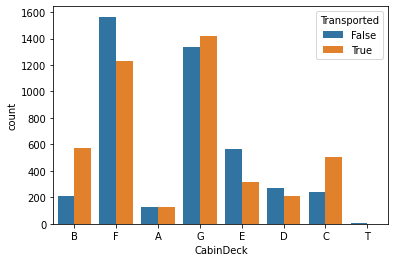

In [239]:
sns.countplot(data = train, x = 'CabinDeck', hue = 'Transported')

In [240]:
#age group variable
train['AgeGroup'] = 0
for i in range(6):
    train.loc[(train.Age >= 10*i) & (train.Age < 10*(i + 1)), 'AgeGroup'] = i
test['AgeGroup'] = 0
for i in range(6):
    test.loc[(test.Age >= 10*i) & (test.Age < 10*(i + 1)), 'AgeGroup'] = i

In [182]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalSpend,NoSpending,CabinDeck,CabinNum,CabinSide,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1,B,0,P,3
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,0,F,0,S,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,0,A,0,S,5
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,0,A,0,S,3
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,0,F,1,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,8536.0,0,A,98,P,4
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,1,G,1499,S,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,1873.0,0,G,1500,S,2
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,4637.0,0,E,608,S,3


In [241]:
from sklearn.preprocessing import LabelEncoder

In [242]:
cat_vars = ['HomePlanet','CryoSleep','Destination', 'VIP', 'CabinDeck', 'CabinNum','CabinSide']

In [174]:
le = LabelEncoder()

In [243]:
for i in cat_vars:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [244]:
train= train.drop(['Cabin'],axis=1)
test= test.drop(['Cabin'],axis=1)

In [245]:
train['Transported']=train['Transported'].replace({True:1,False:0})

In [246]:
train= train.drop(['PassengerId'],axis=1)
#test= test.drop(['PassengerId'],axis=1)

In [ ]:
#modelling

In [247]:
X = train.drop('Transported', axis = 1)
y = train['Transported']

In [200]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [248]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# default model settings first

In [ ]:
#support vector machine SVM

In [249]:
svm_model = SVC()

svm_model.fit(X_train, y_train)

svm_pred_val = svm_model.predict(X_val)
svm_pred_train = svm_model.predict(X_train)

In [253]:
print('training set accuracy:')
print(accuracy_score(y_train.values, svm_pred_train))
print('validation set accuracy:')
print(accuracy_score(y_val.values, svm_pred_val))

training set accuracy:
0.7939315501869427
validation set accuracy:
0.7751581368602645


In [252]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [254]:
param_grid = {'C': [1, 10, 100],  
              'gamma': [0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

In [256]:
grid.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.612 total time=   3.3s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.551 total time=   3.2s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.588 total time=   3.2s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.610 total time=   3.2s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.596 total time=   3.2s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.694 total time=   3.2s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.657 total time=   3.2s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.684 total time=   3.2s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.720 total time=   3.2s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.708 total time=   3.1s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.715 total time=   3.0s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [257]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [258]:
print(grid.score(X_train, y_train))
print(grid.score(X_val, y_val))

0.8862525165372448
0.8809660724554341


In [260]:
test.set_index('PassengerId', inplace=True)

In [261]:
y_pred = grid.predict(test)
sub = pd.DataFrame({'Transported': y_pred.astype(bool)}, index = test.index)

sub.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,False
0023_01,True


In [263]:
sub.rename({'Transported':'Survival'})

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,False
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [262]:
sub.to_csv('submission.csv')